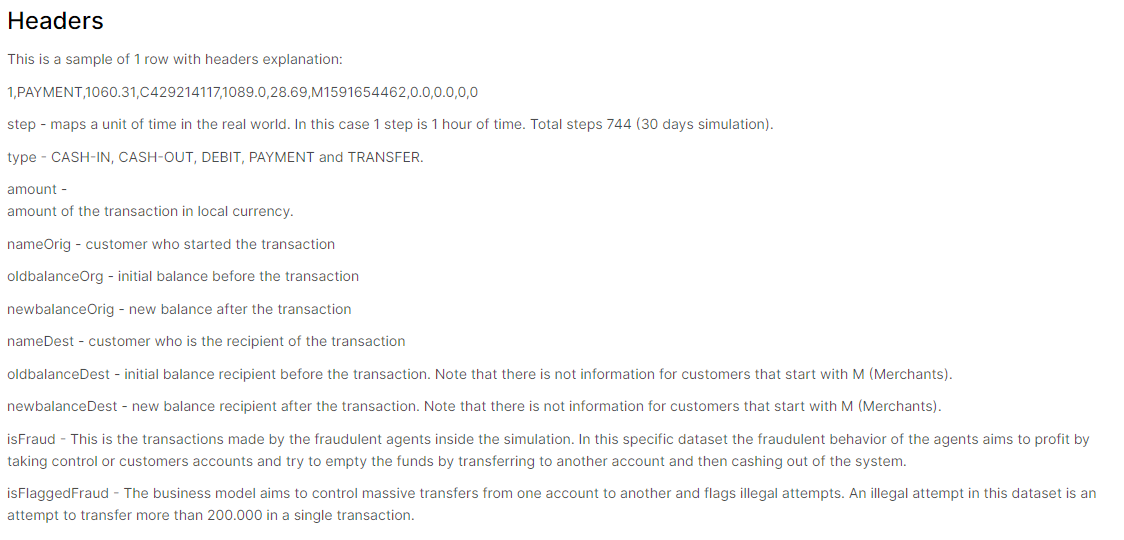

## Importações

In [171]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

In [172]:
plt.rcParams["figure.figsize"] = (16,10)

# 0 - Configurar dataset

### 0.1 - Baixar dataset

#### 0.1.1 - Geral(TESTEM!)

In [173]:
!wget -O fraud.csv https://www.dropbox.com/s/47hd95t7n8hhlgz/fraude.csv?dl=0

zsh:1: no matches found: https://www.dropbox.com/s/47hd95t7n8hhlgz/fraude.csv?dl=0


In [174]:
dataset_path = "fraud.csv"

#### 0.1.1 - Individuais

**Dataset (Henrique B.)**

In [175]:
notebook_path = os.path.abspath("fraude.ipynb")
notebook_dir = os.path.dirname(notebook_path)
dataset_path = f'{notebook_dir}/fraude.csv'

**Baixar dataset (Henrique M.) - por kaggle.json**

In [176]:
from google.colab import drive
drive.mount('/content/drive')

In [177]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [178]:
%cd /content/drive/MyDrive/Kaggle

In [179]:
!kaggle datasets download -d ealaxi/paysim1

In [180]:
!unzip paysim1.zip

In [181]:
src = os.listdir()[2]
os.rename(src, "fraud.csv")
os.listdir()

['fraude.csv',
 '.DS_Store',
 'fraud.csv',
 'fraude.ipynb',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git',
 'notebooks']

In [182]:
dataset_path = "fraud.csv"

**Baixar dataset (Gabriel Magalhães)**

In [183]:
dataset_path = "/content/drive/MyDrive/UFMG/4º Período /Introdução a Ciência de Dados/Projeto/fraud-detection.csv"

### 0.2 - Ler CSV

In [184]:
df = pd.read_csv(dataset_path) 

# 1 - Análise do Dataset

### Análise geral

In [185]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [186]:
df.shape

(6362620, 11)

In [187]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### 1.1 - Verificando nulos

In [189]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### 1.2 - Tirando linhas duplicadas

In [190]:
df.drop_duplicates(inplace=True)

In [191]:
df.shape

(6362620, 11)

### 1.3 - Visualizar variáveis categóricas

In [192]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [193]:
df["type"].value_counts().values

array([2237500, 2151495, 1399284,  532909,   41432])

In [194]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

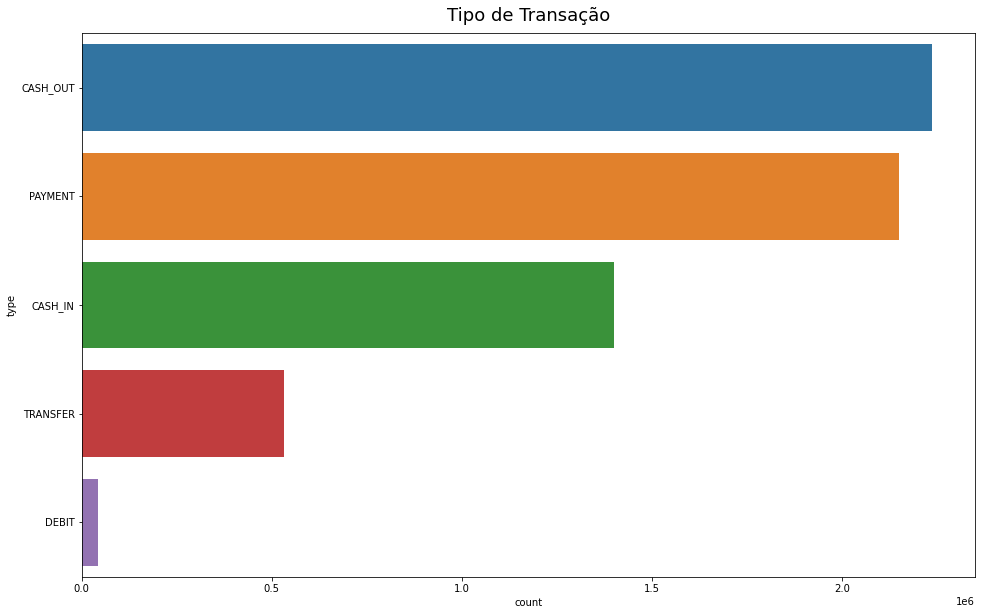

In [195]:
sns.countplot(y=df["type"],order=df["type"].value_counts().index);
plt.title("Tipo de Transação", fontdict={'fontsize':18}, pad=12);

In [196]:
alfabeto = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
nome_orig_dict = {}
for i in alfabeto:
    nome_orig_dict[i] = 0

for i in df["nameOrig"]:
    inicial_nome_orig = i[0].lower()
    nome_orig_dict[inicial_nome_orig] = nome_orig_dict[inicial_nome_orig]+1

for i in nome_orig_dict:
    if nome_orig_dict[i]!=0:
        print(f"{i.upper()}: {nome_orig_dict[i]}")

C: 6362620


In [197]:
alfabeto = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
nome_dest_dict = {}
for i in alfabeto:
    nome_dest_dict[i] = 0

for i in df["nameDest"]:
    inicial_nome_dest = i[0].lower()
    nome_dest_dict[inicial_nome_dest] = nome_dest_dict[inicial_nome_dest]+1

for i in nome_dest_dict:
    if nome_dest_dict[i]!=0:
        print(f"{i.upper()}: {nome_dest_dict[i]}")

C: 4211125
M: 2151495


In [198]:
nome_dest_dict.items()

dict_items([('a', 0), ('b', 0), ('c', 4211125), ('d', 0), ('e', 0), ('f', 0), ('g', 0), ('h', 0), ('i', 0), ('j', 0), ('k', 0), ('l', 0), ('m', 2151495), ('n', 0), ('o', 0), ('p', 0), ('q', 0), ('r', 0), ('s', 0), ('t', 0), ('u', 0), ('v', 0), ('w', 0), ('x', 0), ('y', 0), ('z', 0)])

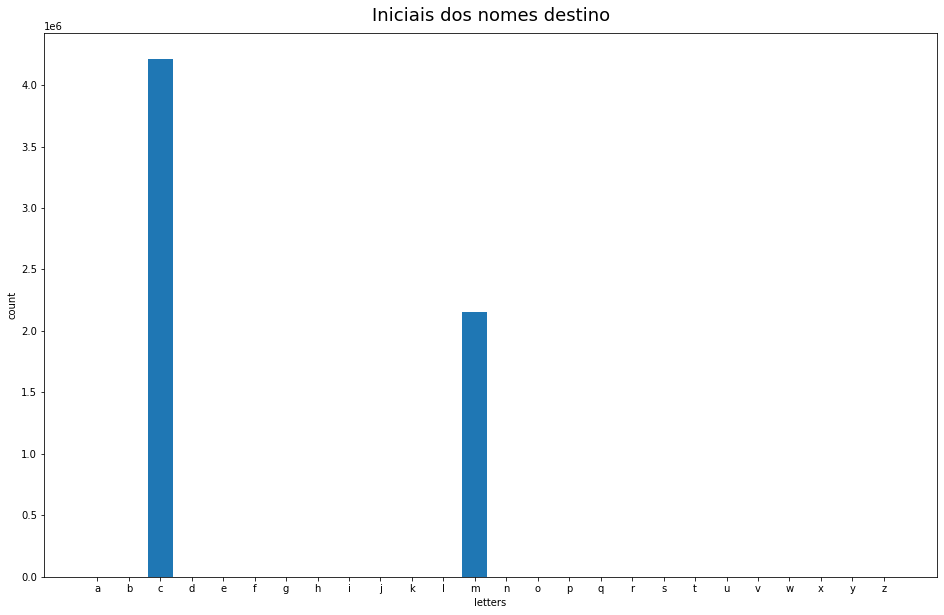

In [259]:
plt.bar(*zip(*nome_dest_dict.items()));
plt.title("Iniciais dos nomes destino", fontdict={'fontsize':18}, pad=12);
plt.xlabel('letters');
plt.ylabel('count');

Text(0, 0.5, 'isFlaggedFraud')

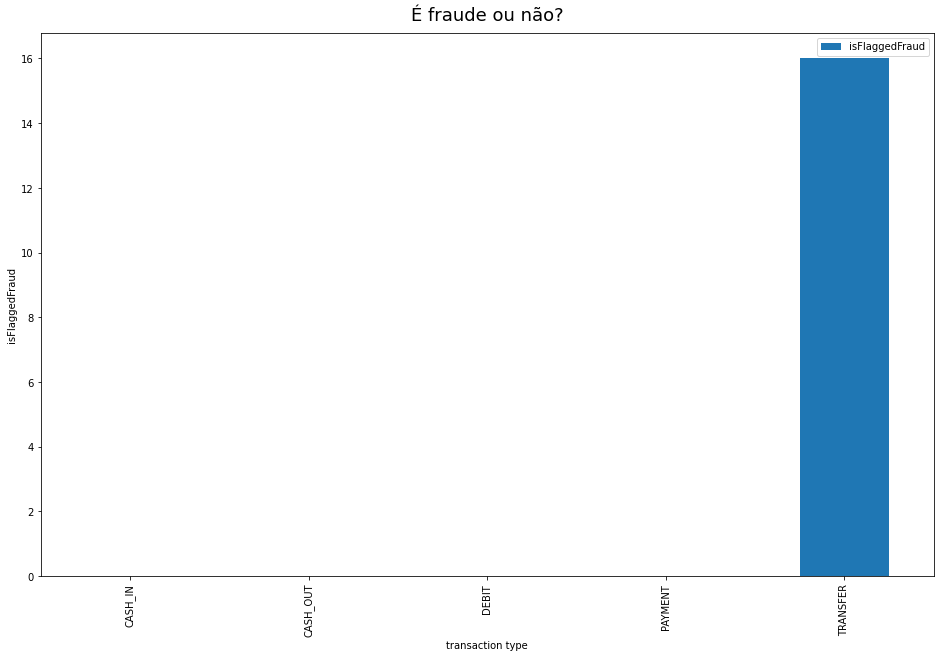

In [200]:
dfFlaggedFraud = df[["type","isFlaggedFraud"]]
dfFlaggedFraud = dfFlaggedFraud.groupby("type").sum()
dfFlaggedFraud.plot.bar()
plt.title("É fraude ou não?", fontdict={'fontsize':18}, pad=12);
plt.xlabel('transaction type');
plt.ylabel('isFlaggedFraud')

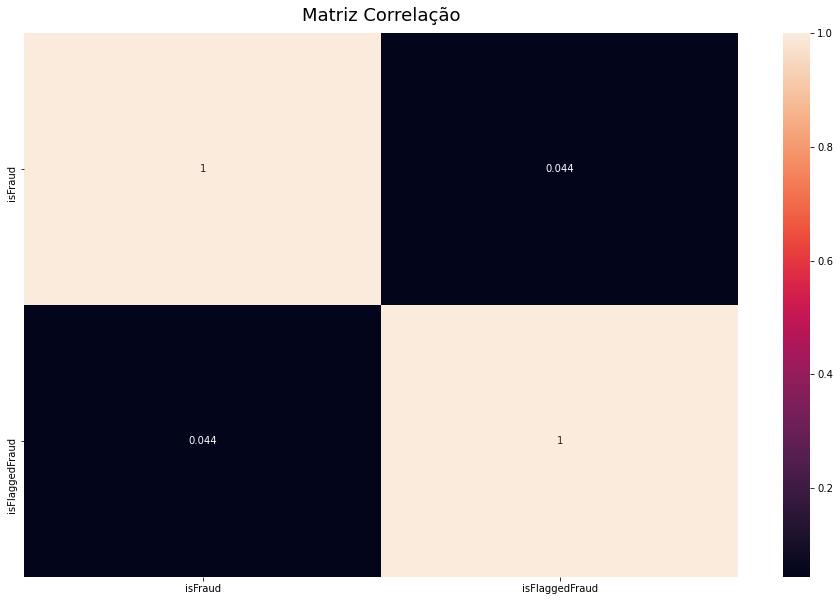

In [201]:
dfFraudVSFlaggedFraud = df[["isFraud","isFlaggedFraud"]]
dfFraudHeatmap = sns.heatmap(dfFraudVSFlaggedFraud.corr(), annot=True)
dfFraudHeatmap.set_title('Matriz Correlação', fontdict={'fontsize':18}, pad=12);

### 1.4 - Visualizar variáveis numéricas

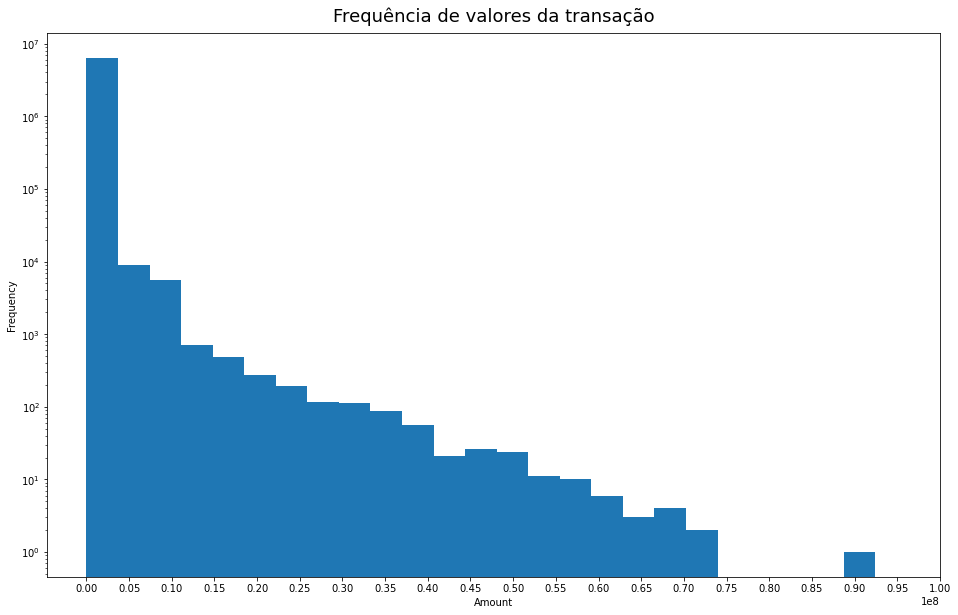

In [202]:
plt.hist(df['amount'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(1.05*1e8),int(5*1e6)))
plt.xlabel('Amount');
plt.title("Frequência de valores da transação", fontdict={'fontsize':18}, pad=12);

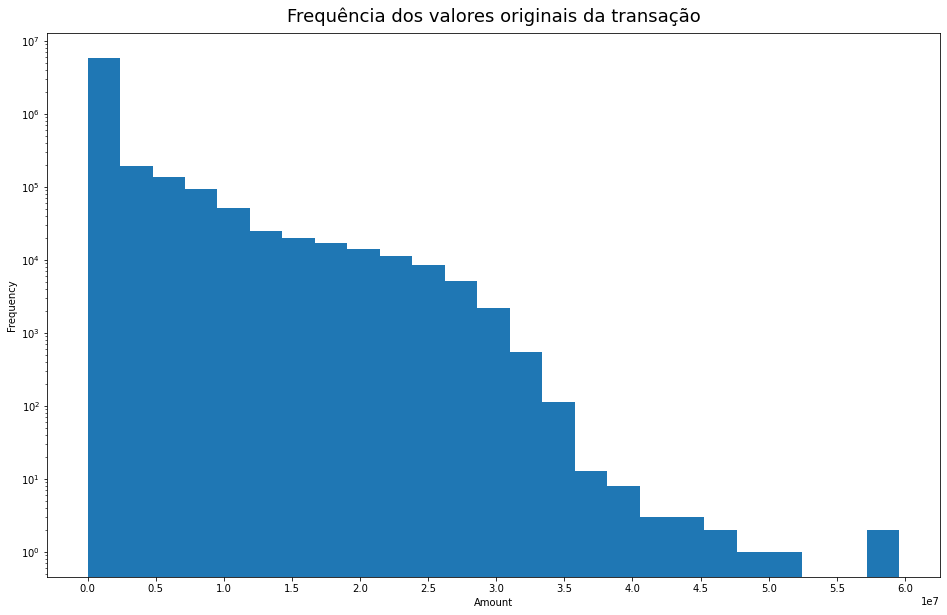

In [203]:
plt.hist(df['oldbalanceOrg'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(6.5*1e7),int(5*1e6)))
plt.xlabel('Amount');
plt.title("Frequência dos valores originais da transação", fontdict={'fontsize':18}, pad=12);

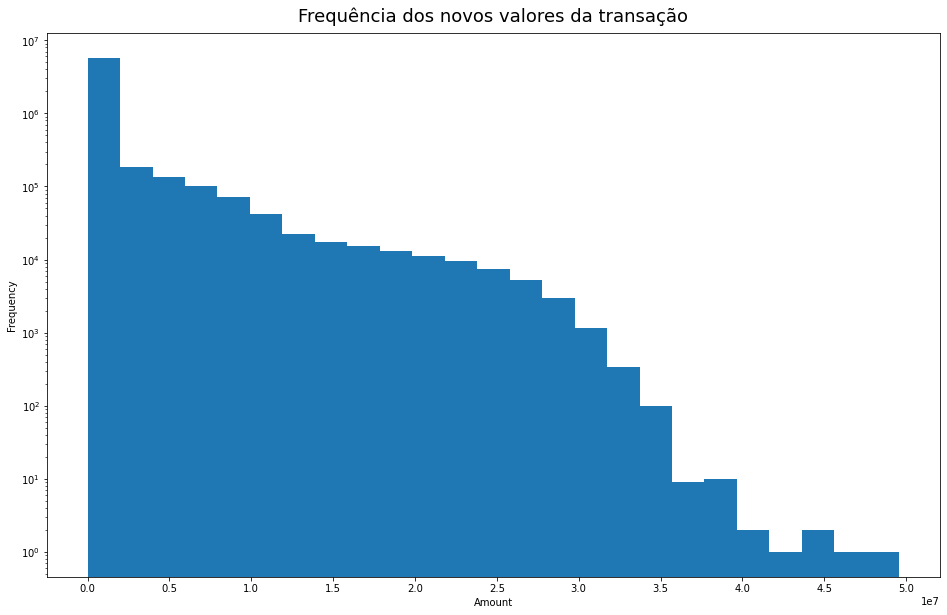

In [204]:
plt.hist(df['newbalanceOrig'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(5.5*1e7),int(5*1e6)))
plt.xlabel('Amount');
plt.title("Frequência dos novos valores da transação", fontdict={'fontsize':18}, pad=12);

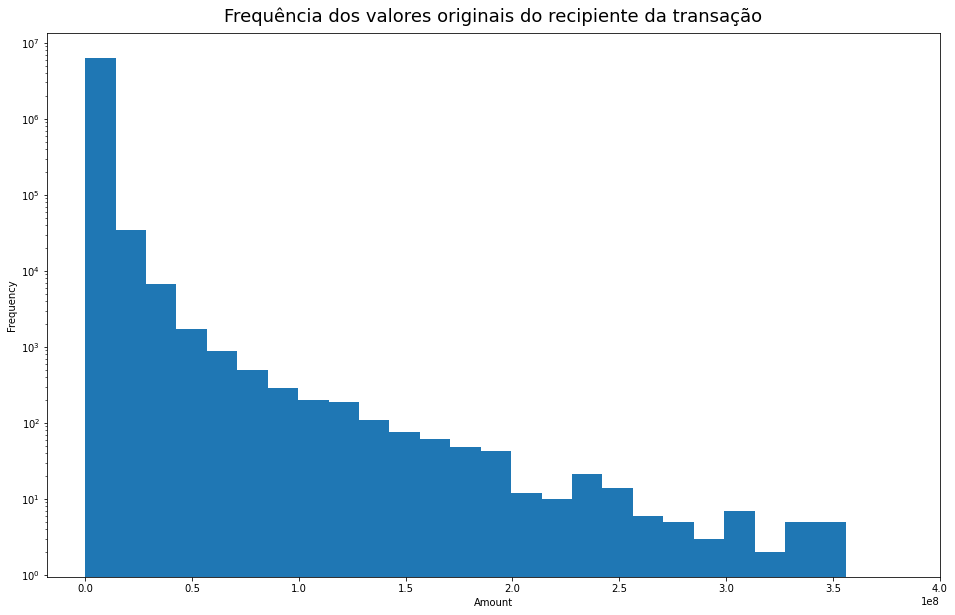

In [205]:
plt.hist(df['oldbalanceDest'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(4.5*1e8),int(5*1e7)))
plt.xlabel('Amount');
plt.title("Frequência dos valores originais do recipiente da transação", fontdict={'fontsize':18}, pad=12);

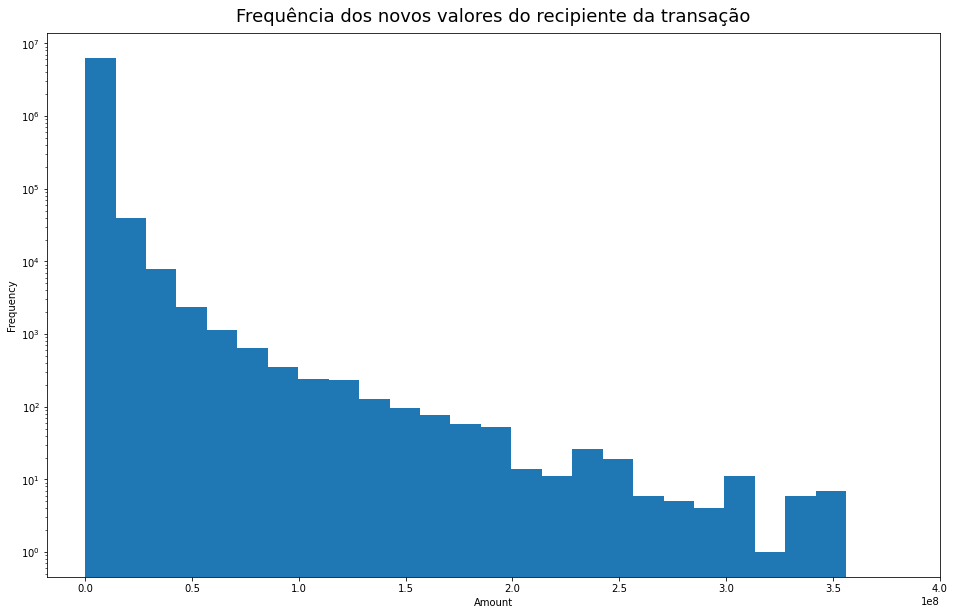

In [206]:
plt.hist(df['newbalanceDest'], bins=25);
plt.yscale('log')
plt.ylabel('Frequency')
plt.xticks(range(0,int(4.5*1e8),int(5*1e7)))
plt.xlabel('Amount');
plt.title("Frequência dos novos valores do recipiente da transação", fontdict={'fontsize':18}, pad=12);

### 1.5 - Matriz de Correlação

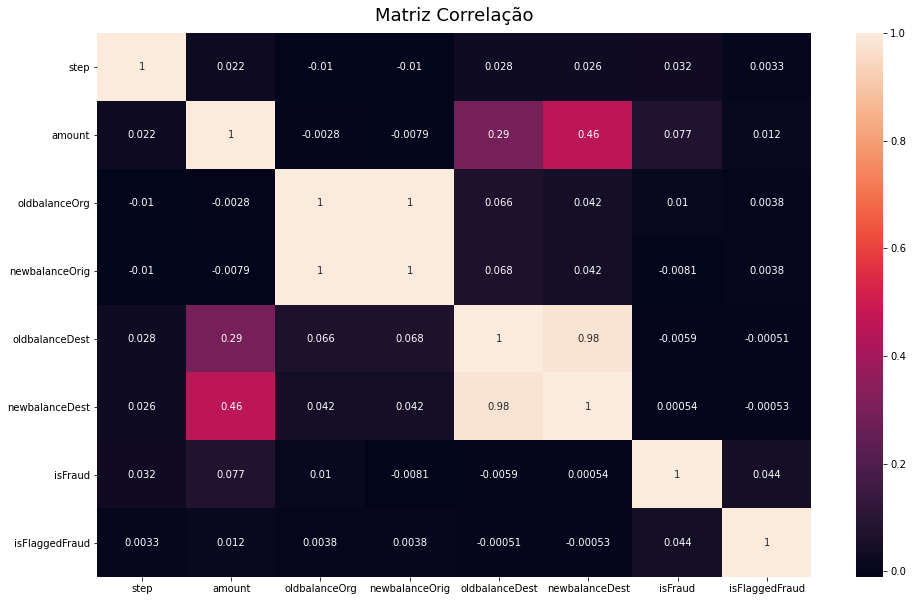

In [207]:
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Matriz Correlação', fontdict={'fontsize':18}, pad=12);

#2 - Testes de Hipótese

### 2.1 - TESTE 1:
**hipoteste nula**: A diferença das médias de ocorrência de fraudes entre Cash_Out e Transfer pode ser explicados pela variabilidade natural

**hipotese alternativa**: A diferença das médias de ocorrência de fraudes entre Cash_Out e Transfer não pode ser explicados pela variabilidade natural

#### Preparação dos dados

In [208]:
data = df.copy()

In [209]:
data["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [210]:
data = data[["type", "isFraud"]]
data_media = data.groupby('type').mean()
data_media

,isFraud
type,
CASH_IN,0.000000
CASH_OUT,0.001840
DEBIT,0.000000
PAYMENT,0.000000
TRANSFER,0.007688


Apenas CASH_OUT e TRANSFER possuem fraudes

In [211]:
data = data[data['type'].isin(['CASH_OUT', 'TRANSFER'])]
data_media = data.groupby('type').mean()
data_media

,isFraud
type,
CASH_OUT,0.001840
TRANSFER,0.007688


**Estatística de teste**:

In [212]:
est_teste = data_media.values[1][0]-data_media.values[0][0]
est_teste

0.005848438685817112

#### Teste por permutação

In [219]:
N = 500
filtro = data['type'] == 'CASH_OUT'
t_obs = data[filtro]['isFraud'].mean() - data[~filtro]['isFraud'].mean()
diffs = np.zeros(N)
for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = data[filtro]['isFraud'].mean() - data[~filtro]['isFraud'].mean()

#### Identificando limites

In [222]:
c_inf = np.percentile(diffs, 2.5)
c_sup = np.percentile(diffs, 97.5)

In [223]:
print(c_inf)
print(c_sup)
print(t_obs)

-0.00017011549935926139
0.0001391317504279842
-0.005848438685817112


#### Visualizando resultado

In [224]:
if t_obs<c_sup and t_obs>c_inf:
    print("hipotese nula")
else:
    print("hipotese alternativa")

hipotese alternativa


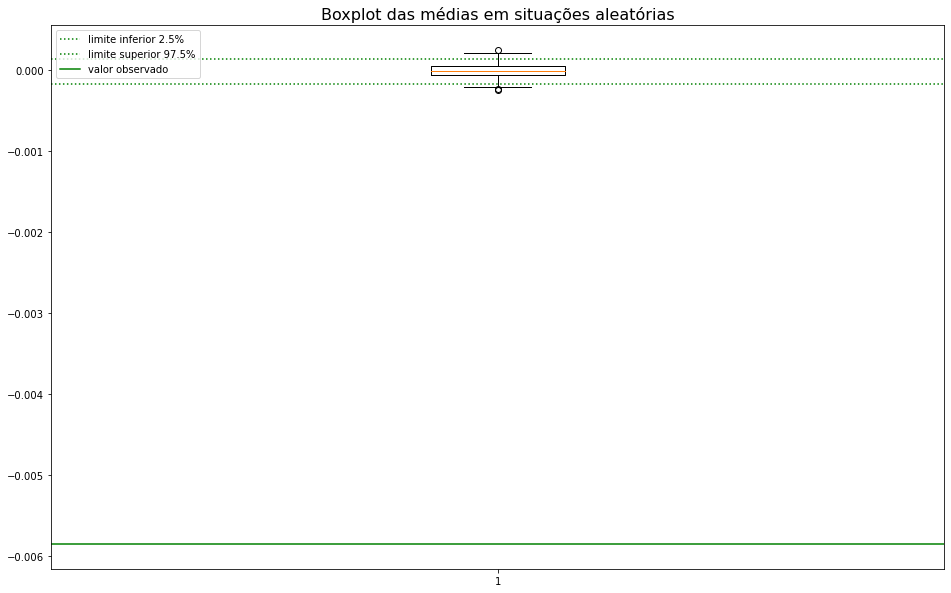

In [257]:
plt.boxplot(diffs)
inf = plt.axhline(y=c_inf, color = "g", ls = ":", label="limite inferior 2.5%")
sup = plt.axhline(y=c_sup, color = "g", ls = ":", label="limite superior 97.5%")
obs = plt.axhline(y=t_obs, color = "g", ls = "-", label="valor observado")

plt.legend(handles=[inf, sup, obs], loc=2)

plt.title("Boxplot das médias em situações aleatórias", fontdict={"fontsize": 16})
plt.show()

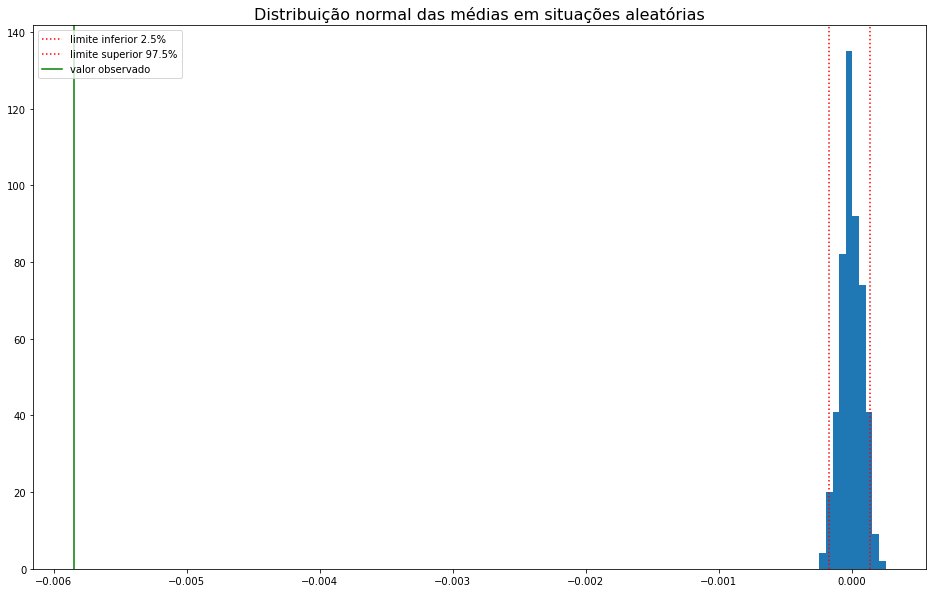

In [251]:
plt.hist(diffs)
inf = plt.axvline(x=c_inf, color = "r", ls = ":", label="limite inferior 2.5%")
sup = plt.axvline(x=c_sup, color = "r", ls = ":", label="limite superior 97.5%")
obs = plt.axvline(x=t_obs, color = "g", ls = "-", label="valor observado")

plt.legend(handles=[inf, sup, obs], loc=2)

plt.title("Distribuição normal das médias em situações aleatórias", fontdict={"fontsize": 16})
plt.show()

### 2.2 - TESTE 2:

Fazendo $1$ como a ocorrência de fraude e $0$ como a não ocorrência de fraude, podemos modelar:

*   O grupo de transações que esgotam o saldo como $X_1, ..., X_m \overset{idd}{\sim} \text{Ber}(p_{total})$;

*   O grupo de transações que não esgotam o saldo como $Y_1, ..., Y_n \overset{idd}{\sim} \text{Ber}(p_{not\;total})$.

Nossa meta é utilizar essas informações para responder a **questão de interesse**: 

**Uma transação que esgota o saldo de uma conta tem maior probabilidade de ser uma fraude?**

Para essa questão, temos respectivamente as hipóteses nula e alternativa:

$\quad \quad H_{0}: p_{total} = p_{not\;total},\quad  H_{1}: p_{total} > p_{not\;total}$ 

O teste adotado para essa hipotese está abaixo:

$\quad \quad \psi = 1\Biggr(\dfrac{2(\overline{X}_m - \overline{Y}_n)}{\sqrt{\frac{1}{m} + \frac{1}{n}}} > 1.96\Biggr)$ 

*a fórmula para esse teste provém de um intervalo de 95% de confiança conservador utilizando o método conservativo*.

Como temos que apenas as transações de saque e de transeferência podem ser consideradas fraudes, vamos aplicar o teste apenas nessas duas ocasiões.

In [ ]:
test2 = df.copy()
test2 = test2[test2["type"].isin(["CASH_OUT", "TRANSFER"])][["amount", "oldbalanceOrg", "isFraud"]]
test2["relativeAmount"] = (test2["amount"] / test2["oldbalanceOrg"])

In [ ]:
test2Total = test2.query("relativeAmount == 1")
test2TotalFraud = test2Total.query("isFraud == 1")
test2TotalMean = test2TotalFraud.size / test2Total.size
test2TotalMean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [ ]:
test2NotTotal = test2.query("relativeAmount != 1")
test2NotTotalFraud = test2NotTotal.query("isFraud == 1")
test2NotTotalMean = test2NotTotalFraud.size / test2NotTotal.size
test2NotTotalMean

0.002964544224336551

In [ ]:
test2Result = 2*(test2TotalMean - test2NotTotalMean)/(((1 / test2Total.size) + (1/test2NotTotal.size))**0.5)
test2Result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

In [ ]:
if(test2Result > 1.96):
  print("Hipotese nula rejeitada.")
else:
  print("Hipotese nula falhou em ser rejeitada")

Hipotese nula falhou em ser rejeitada


**A hipótese nula foi rejeitada. Portanto uma transação que esgota o saldo de uma conta tem maior probabilidade de ser uma fraude.**

### 2.3 - TESTE 3

Fazendo $1$ a pessoa que cometeu pelo menos uma fraude e $0$ como a pessoa que não cometeu fraudes, podemos modelar:

*   O grupo amostral de pessoas como $X_1, ..., X_n \overset{idd}{\sim} \text{Ber}(p_{start})$;


Sendo $Y$ o conjunto de pessoas que cometeteram fraudes, faremos agora $1$ para a pessoa que cometeu mais de uma fraude e $0$ para a que apenas cometeu apenas uma. Podemos modelar:

*   As pessoas que cometeram pelo menos uma fraude como $Y_1, ..., Y_m \overset{idd}{\sim} \text{Ber}(p_{after})$.

sendo que $n \geq m$.

Nossa meta é utilizar essas informações para responder a **questão de interesse**: 

**Uma pessoa que originou uma fraude tem tendência a originar novas fraudes?**

Para essa questão, temos respectivamente as hipóteses nula e alternativa:

$\quad \quad H_{0}: p_{start} = p_{after},\quad  H_{1}: p_{start} < p_{after}$ 

O teste adotado para essa hipotese está abaixo:

$\quad \quad \psi = 1\Biggr(\dfrac{2(\overline{Y}_m - \overline{X}_n)}{\sqrt{\frac{1}{m} + \frac{1}{n}}} > 1.96\Biggr)$ 

*a fórmula para esse teste provém de um intervalo de 95% de confiança conservador utilizando o método conservativo*.

Como temos que apenas as transações de saque e de transeferência podem ser consideradas fraudes, vamos aplicar o teste apenas nessas duas ocasiões.

In [ ]:
test3Df = df[df["type"].isin(["CASH_OUT", "TRANSFER"])][["nameOrig", "isFraud"]]
test3Df = test3Df.groupby("nameOrig").sum()

In [ ]:
def test3(df):
  atLeastOne= df.query("isFraud > 0")
  pStart = atLeastOne.size / df.size
  atLeastTwo = atLeastOne.query("isFraud > 1")
  pAfter = atLeastTwo.size / atLeastOne.size
  result = 2*(pAfter - pStart)/(((1 / df.size) + (1/atLeastOne.size))**0.5)
  return result

In [ ]:
if(test3(test3Df) > 1.96):
  print("Hipotese nula rejeitada.")
else:
  print("Hipotese nula falhou em ser rejeitada")

Hipotese nula falhou em ser rejeitada


**A hipótese nula falhou em ser rejeitada**. Contudo faremos um teste análogo ao último para contas de destinos.

In [ ]:
test3Df = df[df["type"].isin(["CASH_OUT", "TRANSFER"])][["nameDest", "isFraud"]]
test3Df = test3Df.groupby("nameDest").sum()

In [ ]:
if(test3(test3Df) > 1.96):
  print("Hipotese nula rejeitada.")
else:
  print("Hipotese nula falhou em ser rejeitada")

Hipotese nula falhou em ser rejeitada


**A hipótese nula falhou em ser rejeitada novamente. Portanto o fato de uma origem ou destino já ter se envolvido em uma fraude não aumenta a probabilidade de ocorrências de novas fraudes.**

### Demais testes(podem ou não ser feitos)

TESTE 3:

hipotese nula: A relação entre o valor da transação e o tipo de destinatário pode ser explicada pelo acaso

hipotese alternativa: A relação entre o valor da transação e o tipo de destinatário não pode ser explicada pelo acaso

TESTE 4:

hipoteste nula: A hora da transação não afeta a ocorrência de fraudes

hipotese alternativa: A hora da transação afeta a ocorrência de fraudes

Não é tão bom porque tem 744 horas

TESTE 5:

hipoteste nula: O tipo de destinatário não afeta a ocorrência de fraudes

hipotese alternativa: O tipo de destinatário afeta a ocorrência de fraudes

INTERVALO DE CONFIANÇA 1: (IGNORAR)

Amount dos que são fraudes (via bootstrap ou matematicamente)

Amount dos que não são fraudes (via bootstrap ou matematicamente)

# 3 - Preparação dos dados

## 3.1 - Normalização logarítimica

In [ ]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [ ]:
df['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [ ]:
df['newbalanceOrig'].describe()

count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

In [ ]:
df['oldbalanceDest'].describe()

count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [ ]:
df['newbalanceDest'].describe()

count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.146614e+05
75%      1.111909e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

Todos tem como valor mínimo 0. log 0 é impossível, logo deve-se mudar os valores para retirar o 0 antes de mudar a escala para logarítmica.

In [ ]:
log_list = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for i in log_list:
    df[i] = (0.1+df[i])#Como existem valores iguais a 0, é preciso tirá-los para fazer o log
    df[i] = np.log(df[i])

In [ ]:
df['newbalanceDest'].describe()

count    6.362620e+06
mean     7.447785e+00
std      7.779398e+00
min     -2.302585e+00
25%     -2.302585e+00
50%      1.227682e+01
75%      1.392159e+01
max      1.969094e+01
Name: newbalanceDest, dtype: float64

## 3.2 - Padronização dos dados
Apenas variáveis contínuas e discretas devem ser padronizadas.

In [ ]:
colunas_x_scaler = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
scaler = Scaler()

df[colunas_x_scaler] = scaler.fit_transform(df[colunas_x_scaler])

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,-0.907025,C1231006815,0.807207,1.064841,M1979787155,-1.149416,-1.253358,0,0
1,1,PAYMENT,-1.823428,C1666544295,0.495724,0.780990,M2044282225,-1.149416,-1.253358,0,0
2,1,TRANSFER,-3.107899,C1305486145,-0.217747,-0.854877,C553264065,-1.149416,-1.253358,1,0
3,1,CASH_OUT,-3.107899,C840083671,-0.217747,-0.854877,C38997010,0.408776,-1.253358,1,0
4,1,PAYMENT,-0.813131,C2048537720,0.596146,0.839157,M1230701703,-1.149416,-1.253358,0,0
5,1,PAYMENT,-1.033743,C90045638,0.634985,0.897226,M573487274,-1.149416,-1.253358,0,0
6,1,PAYMENT,-1.086189,C154988899,0.818280,1.077465,M408069119,-1.149416,-1.253358,0,0
7,1,PAYMENT,-1.030656,C1912850431,0.812355,1.071328,M633326333,-1.149416,-1.253358,0,0
8,1,PAYMENT,-1.399541,C1265012928,0.185208,-0.854877,M1176932104,-1.149416,-1.253358,0,0
9,1,DEBIT,-1.243950,C712410124,0.596743,0.865586,C195600860,0.495441,0.405884,0,0


## 3.3 - Separação dos dados
É preciso separar os dados em treino, teste e validação antes de normalizar os dados, caso contrário ocorrerá vazamento de dados.
60% dos dados serão usados no grupo de treinamento, 25% no grupo de validação e 15% no grupo de teste.

### 3.3.1 - Separa em treino, teste e validacao

In [ ]:
tamanho_df = df.shape[0]
colunas_y = ["isFraud"]
colunas_nao_x = ["isFraud", "isFlaggedFraud"]
colunas_x = [coluna for coluna in df.columns if coluna not in colunas_nao_x]

# Treino 
fim_treino = round(tamanho_df * 0.6)

treino = df.loc[0:fim_treino,:]
fraudes_treino = treino[treino['isFraud'] == 1]
legitimo_treino = treino[treino['isFraud'] == 0]
legitimo_treino = legitimo_treino.sample(n=fraudes_treino.shape[0], random_state=1)
treino_balanceado = pd.concat([legitimo_treino, fraudes_treino], axis= 0)
x_treino_balanceado = treino_balanceado.loc[:, colunas_x]
y_treino_balanceado = treino_balanceado.loc[:, colunas_y]

x_treino = df.loc[0:fim_treino,colunas_x]
y_treino = df.loc[0:fim_treino, colunas_y]


# Validacao
fim_validacao = round(tamanho_df * (0.6 + 0.25))

validacao = df.loc[fim_treino:fim_validacao,:]
fraudes_validacao = validacao[validacao['isFraud'] == 1]
legitimo_validacao = validacao[validacao['isFraud'] == 0]
legitimo_validacao = legitimo_validacao.sample(n=fraudes_validacao.shape[0], random_state=1)
validacao_balanceado = pd.concat([legitimo_validacao, fraudes_validacao], axis= 0)
x_validacao_balanceado = validacao_balanceado.loc[:, colunas_x]
y_validacao_balanceado = validacao_balanceado.loc[:, colunas_y]

x_validacao = df.loc[fim_treino:fim_validacao, colunas_x]
y_validacao =  df.loc[fim_treino:fim_validacao, colunas_y]

# Teste

teste = df.loc[fim_validacao:tamanho_df,:]
fraudes_teste = teste[teste['isFraud'] == 1]
legitimo_teste = teste[teste['isFraud'] == 0]
legitimo_teste = legitimo_teste.sample(n=fraudes_teste.shape[0], random_state=1)
teste_balanceado = pd.concat([legitimo_teste, fraudes_teste], axis= 0)
x_teste_balanceado = teste_balanceado.loc[:, colunas_x]
y_teste_balanceado = teste_balanceado.loc[:, colunas_y]

x_teste =  df.loc[fim_validacao:tamanho_df , colunas_x]
y_teste = df.loc[fim_validacao:tamanho_df, colunas_y]


In [ ]:
print(x_treino.shape)
print(x_validacao.shape)
print(x_teste.shape)

print(x_treino_balanceado.shape)
print(y_treino_balanceado.shape)
print(x_validacao_balanceado.shape)
print(y_validacao_balanceado.shape)
print(x_teste_balanceado.shape)
print(y_teste_balanceado.shape)

(3817573, 9)
(1590656, 9)
(954393, 9)
(6378, 9)
(6378, 1)
(2032, 9)
(2032, 1)
(8016, 9)
(8016, 1)


## 3.4 - Tratamento de variáveis categóricas

### 3.4.1 - Corrigindo variáveis nameOrig e nameDest

In [ ]:
x_treino.loc[x_treino['nameDest'].astype(str).str[0] == 'C', 'nameDest'] = 'C'
x_treino.loc[x_treino['nameDest'].astype(str).str[0] == 'M', 'nameDest'] = 'M'
x_treino_balanceado.loc[x_treino_balanceado['nameDest'].astype(str).str[0] == 'C', 'nameDest'] = 'C'
x_treino_balanceado.loc[x_treino_balanceado['nameDest'].astype(str).str[0] == 'M', 'nameDest'] = 'M'

x_validacao.loc[x_validacao['nameDest'].astype(str).str[0] == 'C', 'nameDest'] = 'C'
x_validacao.loc[x_validacao['nameDest'].astype(str).str[0] == 'M', 'nameDest'] = 'M'
x_validacao_balanceado.loc[x_validacao_balanceado['nameDest'].astype(str).str[0] == 'C', 'nameDest'] = 'C'
x_validacao_balanceado.loc[x_validacao_balanceado['nameDest'].astype(str).str[0] == 'M', 'nameDest'] = 'M'

x_teste.loc[x_teste['nameDest'].astype(str).str[0] == 'C', 'nameDest'] = 'C'
x_teste.loc[x_teste['nameDest'].astype(str).str[0] == 'M', 'nameDest'] = 'M'
x_teste_balanceado.loc[x_teste_balanceado['nameDest'].astype(str).str[0] == 'C', 'nameDest'] = 'C'
x_teste_balanceado.loc[x_teste_balanceado['nameDest'].astype(str).str[0] == 'M', 'nameDest'] = 'M'

In [ ]:
x_treino.loc[x_treino['nameOrig'].astype(str).str[0] == 'C', 'nameOrig'] = 'C'
x_treino_balanceado.loc[x_treino_balanceado['nameOrig'].astype(str).str[0] == 'C', 'nameOrig'] = 'C'

x_validacao.loc[x_validacao['nameOrig'].astype(str).str[0] == 'C', 'nameOrig'] = 'C'
x_validacao_balanceado.loc[x_validacao_balanceado['nameOrig'].astype(str).str[0] == 'C', 'nameOrig'] = 'C'

x_teste.loc[x_teste['nameOrig'].astype(str).str[0] == 'C', 'nameOrig'] = 'C'
x_teste_balanceado.loc[x_teste_balanceado['nameOrig'].astype(str).str[0] == 'C', 'nameOrig'] = 'C'

In [ ]:
x_treino.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,-0.907025,C,0.807207,1.064841,M,-1.149416,-1.253358
1,1,PAYMENT,-1.823428,C,0.495724,0.780990,M,-1.149416,-1.253358
2,1,TRANSFER,-3.107899,C,-0.217747,-0.854877,C,-1.149416,-1.253358
3,1,CASH_OUT,-3.107899,C,-0.217747,-0.854877,C,0.408776,-1.253358
4,1,PAYMENT,-0.813131,C,0.596146,0.839157,M,-1.149416,-1.253358
5,1,PAYMENT,-1.033743,C,0.634985,0.897226,M,-1.149416,-1.253358
6,1,PAYMENT,-1.086189,C,0.818280,1.077465,M,-1.149416,-1.253358
7,1,PAYMENT,-1.030656,C,0.812355,1.071328,M,-1.149416,-1.253358
8,1,PAYMENT,-1.399541,C,0.185208,-0.854877,M,-1.149416,-1.253358
9,1,DEBIT,-1.243950,C,0.596743,0.865586,C,0.495441,0.405884


### 3.4.2 - OneHotEncoder

In [ ]:
onehotencoder_ = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,6])], remainder='passthrough')

x_treino = onehotencoder_.fit_transform(x_treino)
x_treino_balanceado = onehotencoder_.fit_transform(x_treino_balanceado)
x_validacao = onehotencoder_.fit_transform(x_validacao)
x_validacao_balanceado = onehotencoder_.fit_transform(x_validacao_balanceado)
x_teste = onehotencoder_.fit_transform(x_teste)
x_teste_balanceado = onehotencoder_.fit_transform(x_teste_balanceado)

In [ ]:
print(x_treino.shape)
print(x_validacao.shape)
print(x_teste.shape)

print(x_treino_balanceado.shape)
print(x_validacao_balanceado.shape)
print(x_teste_balanceado.shape)

(3817573, 14)
(1590656, 14)
(954393, 14)
(6378, 14)
(2032, 14)
(8016, 14)


### 3.5 - Ajustes finais

In [ ]:
y_treino = y_treino.to_numpy()
y_treino_balanceado = y_treino_balanceado.to_numpy()

y_validacao = y_validacao.to_numpy()
y_validacao_balanceado = y_validacao_balanceado.to_numpy()

y_teste = y_teste.to_numpy()
y_teste_balanceado = y_teste_balanceado.to_numpy()

In [ ]:
y_treino = y_treino.ravel()
y_treino_balanceado = y_treino_balanceado.ravel()

y_validacao = y_validacao.ravel()
y_validacao_balanceado = y_validacao_balanceado.ravel()

y_teste = y_teste.ravel()
y_teste_balanceado = y_teste_balanceado.ravel()

# 4 - Classificadores

## 4.1 - Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

### 4.1.1 - Dados não balanceados

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_treino,y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(x_treino, y_treino)

0.9994926095715786

In [ ]:
lr.score(x_teste, y_teste)

0.9977755494853797

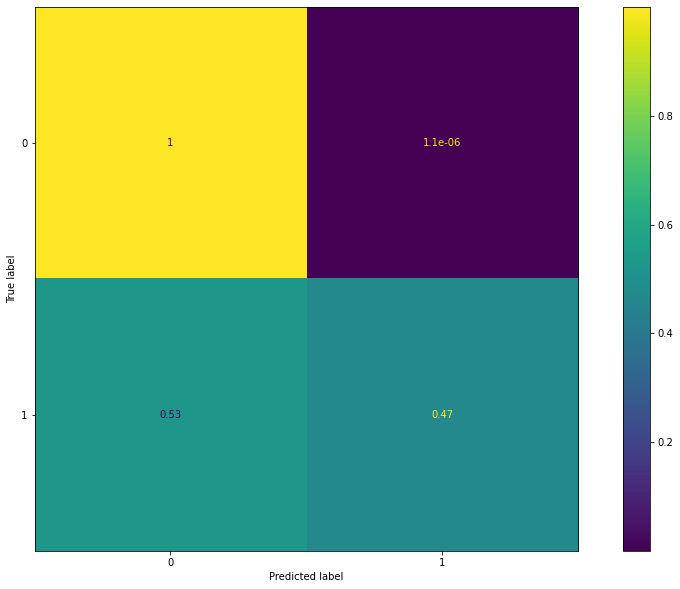

In [ ]:
plot_confusion_matrix(lr, x_teste, y_teste, normalize='true')
plt.show()

### 4.1.2 - Dados Balanceados

In [ ]:
lr = LogisticRegression(max_iter=1500)

In [ ]:
lr.fit(x_treino_balanceado, y_treino_balanceado)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(x_treino_balanceado, y_treino_balanceado)

0.9479460645970523

In [ ]:
lr.score(x_teste_balanceado, y_teste_balanceado)

0.9356287425149701

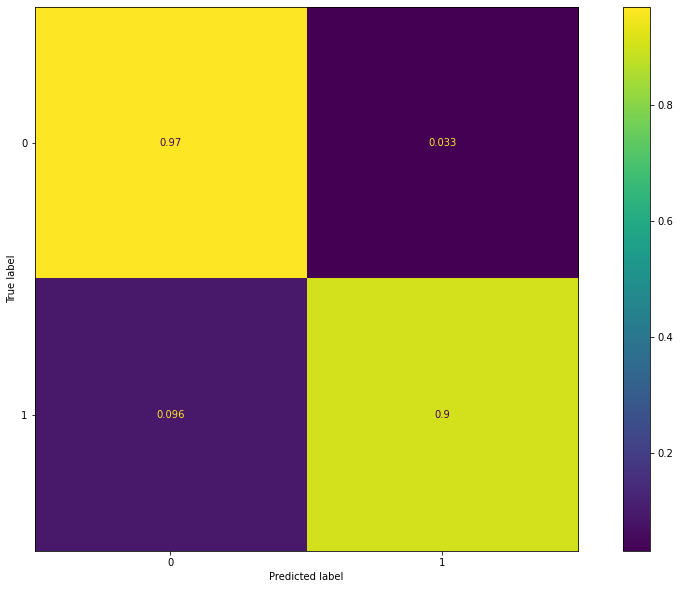

In [ ]:
plot_confusion_matrix(lr, x_teste_balanceado, y_teste_balanceado, normalize='true')
plt.show()

In [ ]:
lr.score(x_teste, y_teste)

0.9698929057526616

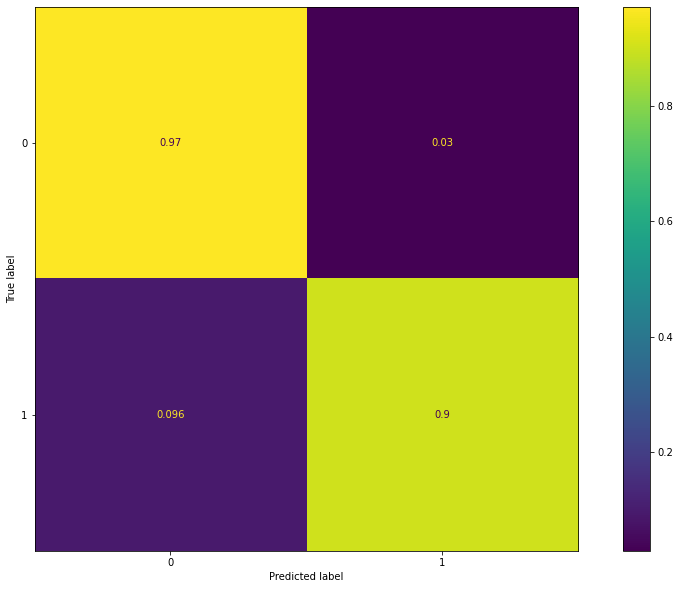

In [ ]:
plot_confusion_matrix(lr, x_teste, y_teste, normalize='true')
plt.show()